# Ex1 - Filtering and Sorting Data



### Step 1. Import the necessary libraries

In [2]:
!pip install numpy
import numpy as np


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install pandas
import pandas as pd


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) and assign it to a variable called chipo.

In [5]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"   
chipo = pd.read_csv(url, sep="\t")  #importamos los datos en la variable chipo
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 3. Name of the max valued product

In [6]:
chipo.info()  #me dice la cantidad de entradas de productos vendidos en este caso. nos da la info que necesitamos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [7]:
chipo["item_price"]= chipo["item_price"].str.replace("$","").astype(float)  #reemplazar lo que nos interesa y convertirlo a la clase
#que queramos
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [8]:
chipo[chipo["item_name"] == "Chicken Bowl"]["item_price"]  #nos devuelve todo de forma desordenada

4       16.98
5       10.98
13      11.25
19       8.75
26       8.49
        ...  
4590    11.25
4591     8.75
4595     8.75
4599     8.75
4604     8.75
Name: item_price, Length: 726, dtype: float64

In [9]:
chipo[chipo["item_name"] == "Chicken Bowl"].sort_values("item_price")  # ordeando

,order_id,quantity,item_name,choice_description,item_price
3101,1237,1,Chicken Bowl,"[Fresh Tomato (Mild), [Lettuce, Fajita Veggies...",8.19
3664,1466,1,Chicken Bowl,"[Fresh Tomato (Mild), [Lettuce, Fajita Veggies...",8.19
2918,1160,1,Chicken Bowl,"[Fresh Tomato (Mild), [Rice, Sour Cream, Cheese]]",8.19
348,150,1,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Rice, Fajit...",8.49
2813,1117,1,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",8.49
...,...,...,...,...,...
4423,1764,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",22.50
1429,578,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Sour Cream, Guacam...",22.50
2510,997,2,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",22.50
1514,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",26.25


In [10]:
chicken_ordenado = chipo[chipo["item_name"] == "Chicken Bowl"].sort_values("item_price")[["quantity", "item_price"]]

In [11]:
chicken_ordenado.drop_duplicates()  #quitar los duplicados!!!

,quantity,item_price
3101,1,8.19
348,1,8.49
4236,1,8.50
4511,1,8.75
2919,1,10.58
5,1,10.98
3249,1,11.25
2771,2,16.98
1017,2,17.50
2075,2,21.96


In [12]:
# todo el código en una sola linea 

chipo.loc[chipo["item_name"] == "Chicken Bowl", ["quantity", "item_price"]].sort_values("item_price").drop_duplicates()

,quantity,item_price
3101,1,8.19
348,1,8.49
4236,1,8.50
4511,1,8.75
2919,1,10.58
5,1,10.98
3249,1,11.25
2771,2,16.98
1017,2,17.50
2075,2,21.96


In [13]:
#todo para sacar la clumna del precio unitario!
chipo["unit_price"] = chipo["item_price"] / chipo["quantity"]
chipo

,order_id,quantity,item_name,choice_description,item_price,unit_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [15]:
chickens = chipo[chipo["item_name"] == "Chicken Bowl"]
chickens

,order_id,quantity,item_name,choice_description,item_price,unit_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75,8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49,8.49
...,...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25,11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75,8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75,8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75,8.75


<Axes: >

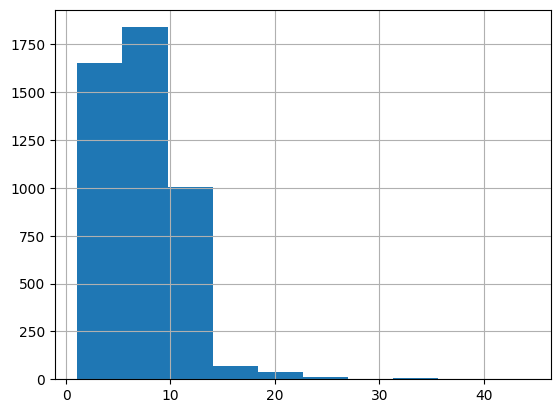

In [22]:
chipo["item_price"].hist()  #convertimos el precio a un real y lo podemos ver aquí

In [16]:
chipo["item_price"]  #aqui podemos ver la transformación del precio a int

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [34]:
chipo.head()  #sin o le indicas nada, te saca las 5 primeras filas de la tabla . sino, puedes añadir hasta cuantas filas puedes ver

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [35]:
chipo.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",8.75


In [36]:
# cual es el item más caro?? 
maximo = chipo["item_price"].max()
maximo

np.float64(44.25)

In [37]:
chipo[chipo["item_price"] == maximo]   #selecciono la columna de item_price y gener una máscara con el maximo
#nos devuelve la tabla con el item que tiene el precio maximo usando la variable que hemos reado antes 


,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25


In [38]:
chipo[chipo["item_price"] ==chipo["item_price"].max()]["item_name"].values[0]

'Chips and Fresh Tomato Salsa'

In [39]:
chipo["item_name"].value_counts()  #1 la vriable 2 la columna que quiero 3. la veces que se ha pedido un item. 

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [40]:
chipo[chipo["item_name"] == "Chicken Bowl"]  #generar una mascara para ver cuantas veces se pidio un producto concreto

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [41]:
chipo["total_price"] = chipo["item_price"] * chipo["quantity"]  #genera una nueva columna en este caso total price
chipo["total_price"]
chipo

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [42]:
chipo["item_name"].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

In [43]:
chipo[chipo["item_price"]>10]  #me dice que hay 1130 productos mayores de 10 

,order_id,quantity,item_name,choice_description,item_price,total_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98,10.98
...,...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25,11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75


In [44]:
#para hacer la suma de esos que cuestan más de 10 
chipo[chipo["item_price"]>10]["item_price"].sum()   

np.float64(14003.54)

In [45]:
chipo[chipo["item_name"]=="Chicken Burrito"]

,order_id,quantity,item_name,choice_description,item_price,total_price
16,8,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49,8.49
17,9,1,Chicken Burrito,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.49,8.49
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98,10.98
29,15,1,Chicken Burrito,"[Tomatillo-Green Chili Salsa (Medium), [Pinto ...",8.49,8.49
45,21,1,Chicken Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",10.98,10.98
...,...,...,...,...,...,...
4556,1811,1,Chicken Burrito,"[Tomatillo Green Chili Salsa, [Fajita Vegetabl...",11.25,11.25
4558,1812,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75,8.75
4559,1812,1,Chicken Burrito,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Gua...",11.25,11.25
4566,1816,1,Chicken Burrito,"[Roasted Chili Corn Salsa, [Pinto Beans, Chees...",8.75,8.75


In [ ]:
chipo[chipo["unit_price"] == chipo["unit_price"].max()]  #con el precio unitario hacemos una máscara en la que el unit_price
#sea el preci máximo del unit_place


,order_id,quantity,item_name,choice_description,item_price,unit_price
281,123,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Black Beans, Chee...",23.78,11.89
606,250,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Pinto Beans, Cheese, Gua...",11.89,11.89
613,253,2,Steak Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",23.78,11.89
749,309,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Rice, Cheese, Lett...",11.89,11.89
1132,468,1,Carnitas Salad Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",11.89,11.89
1159,478,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
1229,501,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Rice, Fajita Vegetables,...",11.89,11.89
1311,534,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.89,11.89
1326,541,1,Barbacoa Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.89,11.89
1505,612,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Chees...",11.89,11.89


### Step 4. How many products cost more than $10.00?

In [ ]:
chipo[chipo["unit_price"]>10]  #cuantas unidades de productos valen más de 10

,order_id,quantity,item_name,choice_description,item_price,unit_price
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98,10.98
39,19,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75,11.75
...,...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25,11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75


In [ ]:
# nos quedamos con la columna item name que es lo que nos interesa, y para los únicos, usamos unique
chipo[chipo["unit_price"]>10]["item_name"].unique()

array(['Chicken Bowl', 'Steak Burrito', 'Chicken Burrito',
       'Barbacoa Bowl', 'Veggie Burrito', 'Veggie Bowl',
       'Chicken Soft Tacos', 'Steak Bowl', 'Carnitas Burrito',
       'Carnitas Bowl', 'Barbacoa Burrito', 'Chicken Salad Bowl',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl', 'Chicken Salad',
       'Steak Salad Bowl', 'Chicken Crispy Tacos', 'Veggie Soft Tacos',
       'Barbacoa Soft Tacos', 'Carnitas Crispy Tacos',
       'Carnitas Salad Bowl', 'Barbacoa Salad Bowl', 'Steak Soft Tacos',
       'Carnitas Soft Tacos', 'Steak Crispy Tacos'], dtype=object)

In [ ]:
len(chipo[chipo["unit_price"]>10]["item_name"].unique())  #para qudarnos con un numero concreto

25

In [25]:
#tra dforma de quedarns con un numero concreto con nunique
chipo[chipo["unit_price"]>10]["item_name"].nunique()

25

### Step 4.1: Y cuántos pedidos se han hecho con un producto de más de 10$? Es lo mismo?

In [26]:
chipo

,order_id,quantity,item_name,choice_description,item_price,unit_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [ ]:
#por tantp, quiero un numero concreto de pedidos que tenga por lo menos un item de valor + 10
#order_id  + item_price   DOS FORMAS DISTINTAS DE RESOLVER


chipo[chipo["unit_price"] > 10]["order_id"].unique()  #ns devuelve el indice con sus valores y sus valores únicos
#ns queremos quedar con los pedids únicos

array([   3,    4,    7,   12,   19,   20,   21,   24,   26,   27,   28,
         30,   35,   40,   41,   43,   54,   57,   59,   60,   61,   62,
         63,   64,   65,   66,   71,   72,   73,   74,   75,   79,   80,
         83,   84,   86,   89,   90,   93,   94,   95,   99,  103,  107,
        109,  114,  123,  126,  127,  128,  129,  132,  134,  140,  144,
        146,  147,  148,  149,  152,  157,  158,  159,  163,  165,  166,
        168,  170,  171,  174,  175,  176,  177,  178,  179,  180,  186,
        189,  192,  195,  196,  198,  202,  203,  204,  205,  206,  207,
        210,  211,  212,  222,  227,  228,  229,  231,  235,  238,  239,
        241,  242,  243,  245,  248,  250,  253,  256,  258,  261,  262,
        269,  273,  277,  278,  282,  283,  284,  290,  293,  295,  297,
        300,  304,  305,  306,  308,  309,  316,  317,  324,  327,  328,
        329,  337,  338,  339,  341,  343,  347,  350,  356,  357,  358,
        360,  361,  362,  365,  367,  369,  372,  3

In [ ]:
len(chipo[chipo["unit_price"] > 10]["order_id"].unique())   #ya tenemos la cantidad de pedidos 

787

### Step 4.2: Y cuántos pedidos se han hecho de más de 10$? Es lo mismo?

In [ ]:
#el NUMERO DE PEDIDOS en los que el total de productos supera los 10 dolares

#AGRUPAMOS TODAS LAS FILAS QUE TIENEN el mismo order_id. luego SUMAR EL PRECIO TOTAL DECADA PEDIDO

#print(chipo[(chipo["total_price"]>10)]["order_id"].nunique())

889


In [36]:
ordenes_unicas =chipo["order_id"].unique()#nos da todas las ordenes únicas
ordenes_unicas

array([   1,    2,    3, ..., 1832, 1833, 1834], shape=(1834,))

In [ ]:
#una forma de entender a logica que hay dentro.
#seleccionamos de una en una 
#primero tdas las filas DE ORDENES unicas. agruparemos por órdenes y sumarlo todo. 
#filtramos por orden, nos quedamos solo con las filasque pertenecen a cada orden
#con lacondicion d que si es mayor de 10 el precio, se va sumando 

ordenes_unicas = chipo["order_id"].unique()
mas_de_10 = 0

for id in ordenes_unicas:
   order_df = chipo[chipo["order_id"] == id]  #para todas las  ordenes, me creo un nuevo DataFrame con 
   total = order_df["item_price"].sum()
   #print(f"order {id}, total: {total} $")
   if total >=10:
      mas_de_10 += 1
print(mas_de_10)

1834


In [80]:
serie_mas_de_x = chipo.groupby("order_id")["item_price"].sum()  > 20 #el mismo código de arriba se puede hacer asi. esto sería nos devuelve una serie de mas de x 
serie_mas_de_x.sum()

np.int64(566)

In [59]:
orders_mas_10 = chipo.groupby("order_id")["item_price"].sum().sort_values(ascending=False)
orders_mas_10


order_id
926     205.25
1443    160.74
1483    139.00
691     118.25
1786    114.30
         ...  
1262     10.08
1436     10.08
889      10.08
14       10.08
17       10.08
Name: item_price, Length: 1834, dtype: float64

1834

### Step 4.3: Y en cuántos pedidos se ha pagado más de 10$ por un mismo producto? Es lo mismo?

In [ ]:
#ejemplo clase 
chipo[chipo["item_price"]> 10]  #todas las filas de productos queha costado más de 10


,order_id,quantity,item_name,choice_description,item_price,unit_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98,10.98
...,...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25,11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75


In [61]:
chipo[chipo["item_price"]> 10]["order_id"].nunique()

863

In [64]:
#cuantos pedidos se han pagado en total de 10 por un mismo producto
#order_id, quanity, item_price

chipo[(chipo["quantity"]) * (chipo["item_price"])>10]["order_id"].nunique() 
#en el quantity, vemos el TOTAL de productos
# utilizados en un mismo order_id
#luego lo multiplicamos por el precio de dicho producto usando el item_price
# filtramos unicamente el resultado mayr de 10. 
#EJEMPLO. 1 * 11,48 
#EJEMPLO 2 * 5,50



889

### Step 5. What is the price of each item and name it unit_price. Get only item_name and unit_price

In [62]:
chipo[["item_name", "item_price"]]


,item_name,item_price
0,Chips and Fresh Tomato Salsa,2.39
1,Izze,3.39
2,Nantucket Nectar,3.39
3,Chips and Tomatillo-Green Chili Salsa,2.39
4,Chicken Bowl,16.98
...,...,...
4617,Steak Burrito,11.75
4618,Steak Burrito,11.75
4619,Chicken Salad Bowl,11.25
4620,Chicken Salad Bowl,8.75


In [71]:

item = chipo.groupby("item_name")["item_price"].mean()
item

item_name
6 Pack Soft Drink                         6.610185
Barbacoa Bowl                            10.187273
Barbacoa Burrito                          9.832418
Barbacoa Crispy Tacos                    10.928182
Barbacoa Salad Bowl                      10.640000
Barbacoa Soft Tacos                      10.018400
Bottled Water                             1.867654
Bowl                                     14.800000
Burrito                                   7.400000
Canned Soda                               1.320577
Canned Soft Drink                         1.457641
Carnitas Bowl                            10.833971
Carnitas Burrito                         10.132712
Carnitas Crispy Tacos                    11.137143
Carnitas Salad                            8.990000
Carnitas Salad Bowl                      11.056667
Carnitas Soft Tacos                       9.398500
Chicken Bowl                             10.113953
Chicken Burrito                          10.082857
Chicken Crispy Tacos 

### Step 6. Sort by the name of the item

In [ ]:
#ejemplo clase
chipo[["item_name", "unit_name"]]

In [97]:
# size() Calcula el número de registros en cada grupo.
# Esto devuelve el número de veces que aparece cada producto.
chipo.sort_values("item_name")

,order_id,quantity,item_name,choice_description,item_price,total_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98,25.96
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49,6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49,6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49,6.49
...,...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75,8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49,8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25


### Step 7. What was the quantity of the most expensive item ordered? 2 ways

In [ ]:
#ejemplo clase
max = chipo["unit_price"].max()


np.float64(11.89)

In [92]:
max_unit_prices = chipo[chipo["unit_price"] == max] 
max_unit_prices[["quantity", "item_name"]].drop_duplicates()

,quantity,item_name
281,2,Steak Salad Bowl
606,1,Steak Salad Bowl
1132,1,Carnitas Salad Bowl
1229,1,Barbacoa Salad Bowl


In [93]:
# Paso 1: Encontrar el precio máximo
chipo["unit_price"].max()

# Paso 2: Filtrar el DataFrame para obtener los productos con el precio máximo
chipo[chipo["unit_price"] == chipo["unit_price"].max()]["quantity"]



281     2
606     1
613     2
749     1
1132    1
1159    1
1229    1
1311    1
1326    1
1505    1
1571    1
1590    1
1816    1
2401    1
2439    1
2442    1
2610    1
2740    1
2804    1
2957    1
3120    1
3208    1
3350    1
3493    1
3546    1
3749    1
4239    1
4313    1
Name: quantity, dtype: int64

### Step 8. How many times was a Veggie Salad Bowl ordered?

In [ ]:
chipo["item_name"][chipo["item_name"] == "Veggie Salad Bowl"].count()
# siempre vamos de dentro a fuera. primero decimos chipo y miramos item_name
# ***!!!SIEMPRE QUE PONEMOS CHIPO, estamos llamando a toda la tabla, por eso añadimos
# las columnas , en este caso item_name

#peguntar a chat gpt porqué debo añadir dos veces el chipo [item name] 

np.int64(18)

### Step 9. How many times did someone order more than one Canned Soda?

In [115]:
# quantity y iten_name

canel = (chipo["item_name"] == "Canned Soda") & (chipo["quantity"] >= 2)
resultado = chipo[canel][["item_name","quantity"]]
resultado

,item_name,quantity
18,Canned Soda,2
51,Canned Soda,2
162,Canned Soda,2
171,Canned Soda,2
350,Canned Soda,2
352,Canned Soda,2
698,Canned Soda,2
700,Canned Soda,2
909,Canned Soda,2
1091,Canned Soda,2


In [ ]:
chipo[(chipo["item_name"] == "Canned Soda") & (chipo["quantity"]>1)]

,order_id,quantity,item_name,choice_description,item_price,unit_price
18,9,2,Canned Soda,[Sprite],2.18,1.09
51,23,2,Canned Soda,[Mountain Dew],2.18,1.09
162,73,2,Canned Soda,[Diet Coke],2.18,1.09
171,76,2,Canned Soda,[Diet Dr. Pepper],2.18,1.09
350,150,2,Canned Soda,[Diet Coke],2.18,1.09
352,151,2,Canned Soda,[Coca Cola],2.18,1.09
698,287,2,Canned Soda,[Coca Cola],2.18,1.09
700,288,2,Canned Soda,[Coca Cola],2.18,1.09
909,376,2,Canned Soda,[Mountain Dew],2.18,1.09
1091,450,2,Canned Soda,[Dr. Pepper],2.18,1.09


In [77]:
len(chipo[(chipo["item_name"] == "Canned Soda") & (chipo["quantity"]>1)])

20